# Japanese Birth Rate Analysis (1922-2022)

## Context
This project explores a century of birth data in Japan, from 1922 to 2022, to uncover trends and insights into the nation's demographic evolution. Japan's birth rate has undergone significant changes over the past 100 years, influenced by economic development, technological advancements, and shifting social norms.

## Methodology
The analysis utilizes a variety of statistical and machine learning techniques, including:
- Descriptive statistics to understand the distribution and central tendencies of the data.
- Time series analysis to study trends and forecast future births.
- Linear regression to evaluate the impact of various factors on birth rates.
- Clustering to find periods with similar characteristics within the historical data.

Key demographic indicators such as total births, gender ratios, fertility rates, and infant mortality rates are examined. Economic factors like GDP and social metrics like legitimacy rates and parental age differences are also considered to provide a comprehensive view.

## Key Findings
- **Declining Birth Rate**: There has been a marked decline in the birth rate throughout Japan's history, which aligns with global trends in developed nations.
- **Legitimacy Rate Changes**: The legitimacy rate of children hit its peak around the 1970s and 1980s. However, there has been on a rather steep decline since then, reaching levels not seen since the early 1950s.
- **Maternal Age**: The average age of mothers giving birth has increased over time, currently averaging at 30 years old. This suggests a societal shift towards later-in-life parenting.
- **Infant Mortality Reduction**: Technological improvements, better healthcare, and increased wealth are correlated with a significant decrease in infant mortality rates.
- **Parental Age Gap**: The age difference between parents has narrowed over time, indicating changes in gender roles and family planning.

This century-long dataset provides a rich source to understand the dynamics of population changes and the interplay between societal progress and demographic patterns.

# Step 1: Data Preprocessing

Before delving into the analysis, the data underwent several preprocessing steps to ensure its quality and usability. These steps are crucial to prepare the dataset for exploratory data analysis (EDA), statistical modeling, and machine learning.

### Initial Data Import
The project began by importing the primary dataset containing Japan's birth statistics, which provided a detailed account of birth-related metrics over the past century.

### Additional Data Integration
To enrich the analysis, an additional GDP dataset was sourced. This dataset contains historical economic data for Japan, which is instrumental in examining the relationship between economic factors and birth rates.

### Merging Datasets
The birth statistics and GDP datasets were merged based on the year, creating a comprehensive dataset that combines demographic and economic indicators. This integrated dataset serves as the foundation for all subsequent analyses.

### Exploratory Data Analysis (EDA) Enhancements
For effective EDA, several colormaps were created to visually distinguish different aspects of the data. These visual aids facilitate a more intuitive understanding of complex trends and patterns.

### Miscellaneous Preprocessing
The following miscellaneous preprocessing tasks were performed to further refine the data:
- **Datetime Conversion**: The 'year' columns from both datasets were converted to a datetime format to facilitate time series analysis.
- **Renaming Columns**: Columns were renamed for clarity and consistency across the combined dataset.

These preprocessing steps were essential in setting a strong foundation for the rigorous analysis that followed, ensuring that the findings and insights derived from the data are as accurate and meaningful as possible.

In [57]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

colors = ["#f24444", "#ff0000", "#cc0000", "#990000"]  # Light red to dark red
colors_2 = ["#E60012", "#666363", "#000000", "#003A70", "#00552E"] # A mix of red, black, green and blue
japanese_colormap = LinearSegmentedColormap.from_list("custom_red", colors, N=256)
japanese_colormap_2 = LinearSegmentedColormap.from_list("custom_red_2", colors_2)

# Read in the data
df = pd.read_csv('japan_birth.csv')
df.tail()

,Unnamed: 0,year,birth_total,birth_male,birth_female,birth_rate,birth_gender_ratio,total_fertility_rate,population_total,population_male,...,mother_age_30-34,mother_age_35-39,mother_age_40-44,mother_age_over_45,father_age_avg,father_age_firstborn,father_age_secondborn,father_age_thirdborn,legitimate_child,illegitimate_child
119,119,2018,918400.0,470851.0,447549.0,7.4,105.2,1.42,124218285,60454898,...,334906.0,211021.0,51258.0,1659.0,34.0,32.8,34.6,35.6,897359.0,21041.0
120,120,2019,865239.0,443430.0,421809.0,7.0,105.1,1.36,123731176,60208034,...,312582.0,201010.0,49191.0,1649.0,34.0,32.8,34.7,35.7,845068.0,20171.0
121,121,2020,840835.0,430713.0,410122.0,6.8,105.0,1.33,123398962,60002838,...,303436.0,196321.0,47899.0,1676.0,34.1,32.8,34.7,35.8,820795.0,20040.0
122,122,2021,811622.0,415903.0,395719.0,6.6,105.1,1.30,122780487,59686643,...,292439.0,193177.0,48517.0,1617.0,34.2,32.9,34.8,35.9,793020.0,18602.0
123,123,2022,770759.0,395257.0,375502.0,6.3,105.3,1.26,122030523,59313678,...,279517.0,183327.0,46338.0,1658.0,34.2,32.9,34.8,36.0,753031.0,17728.0


In [58]:
# GDP Data
gdp_df = pd.read_csv('API_NY.GDP.MKTP.CD_DS2_en_csv_v2_6298258.csv', skiprows=4)
gdp_df = gdp_df[gdp_df['Country Name'] == 'Japan'].T.reset_index()[4:-1]
gdp_df

,index,119
4,1960,44307342950.400002
5,1961,53508617739.3778
6,1962,60723018683.733299
7,1963,69498131797.333298
8,1964,81749006381.511093
9,1965,90950278257.777802
10,1966,105628070343.110992
11,1967,123781880217.600006
12,1968,146601072685.510986
13,1969,172204199480.889008


In [59]:
# Set both year columns to the same datetime format (it's index for gdp_df and year for df)
gdp_df['index'] = pd.to_datetime(gdp_df['index'], format='%Y')
gdp_df['index'] = gdp_df['index'].dt.year

df['year'] = pd.to_datetime(df['year'], format='%Y')
df['year'] = df['year'].dt.year


In [60]:
# Merge the dataframes
merged_df = pd.merge(df, gdp_df, left_on='year', right_on='index', how='outer')
merged_df = merged_df[merged_df['year'] >= 1922]
merged_df

,Unnamed: 0,year,birth_total,birth_male,birth_female,birth_rate,birth_gender_ratio,total_fertility_rate,population_total,population_male,...,mother_age_40-44,mother_age_over_45,father_age_avg,father_age_firstborn,father_age_secondborn,father_age_thirdborn,legitimate_child,illegitimate_child,index,119
23,23,1922,1969314.0,1004022.0,965292.0,34.3,104.0,NaN,57390100,28799700,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24,24,1923,2043297.0,1043599.0,999698.0,35.2,104.4,NaN,58119200,29176900,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25,25,1924,1998520.0,1019988.0,978532.0,33.9,104.2,NaN,58875600,29568700,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26,26,1925,2086091.0,1060827.0,1025264.0,34.9,103.5,NaN,59736822,30013109,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27,27,1926,2104405.0,1081793.0,1022611.0,34.6,105.8,NaN,60740900,30521300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28,28,1927,2060737.0,1048946.0,1011791.0,33.4,103.7,NaN,61659300,30981500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29,29,1928,2135852.0,1090702.0,1045150.0,34.1,104.4,NaN,62595300,31449100,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30,30,1929,2077026.0,1058666.0,1018360.0,32.7,104.0,NaN,63460600,31890600,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31,31,1930,2085101.0,1069551.0,1015549.0,32.4,105.3,NaN,64450005,32390155,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32,32,1931,2102784.0,1073385.0,1029399.0,32.1,104.3,NaN,65457500,32898500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
# Drop unnecessary columns and rename gdp column
merged_df.drop(columns=['index', 'Unnamed: 0'], inplace=True)
merged_df.rename(columns={merged_df.columns[-1]: 'gdp'}, inplace=True)

merged_df

,year,birth_total,birth_male,birth_female,birth_rate,birth_gender_ratio,total_fertility_rate,population_total,population_male,population_female,...,mother_age_35-39,mother_age_40-44,mother_age_over_45,father_age_avg,father_age_firstborn,father_age_secondborn,father_age_thirdborn,legitimate_child,illegitimate_child,gdp
23,1922,1969314.0,1004022.0,965292.0,34.3,104.0,NaN,57390100,28799700,28590300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24,1923,2043297.0,1043599.0,999698.0,35.2,104.4,NaN,58119200,29176900,28942300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25,1924,1998520.0,1019988.0,978532.0,33.9,104.2,NaN,58875600,29568700,29306900,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26,1925,2086091.0,1060827.0,1025264.0,34.9,103.5,NaN,59736822,30013109,29723713,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27,1926,2104405.0,1081793.0,1022611.0,34.6,105.8,NaN,60740900,30521300,30219600,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28,1927,2060737.0,1048946.0,1011791.0,33.4,103.7,NaN,61659300,30981500,30677800,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29,1928,2135852.0,1090702.0,1045150.0,34.1,104.4,NaN,62595300,31449100,31146100,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30,1929,2077026.0,1058666.0,1018360.0,32.7,104.0,NaN,63460600,31890600,31570000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31,1930,2085101.0,1069551.0,1015549.0,32.4,105.3,NaN,64450005,32390155,32059850,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32,1931,2102784.0,1073385.0,1029399.0,32.1,104.3,NaN,65457500,32898500,32559000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Step 2: Exploratory Data Analysis (EDA) and Feature Engineering

A comprehensive exploratory data analysis was conducted to understand the dynamics of the demographic data. EDA is crucial as it allows us to uncover underlying patterns, spot anomalies, test hypotheses, and check assumptions with the help of summary statistics and graphical representations.

### Visual Analysis through Custom Function
To streamline the EDA, a custom plotting function was created, enabling the visualization of various engineered features. These visualizations were instrumental in revealing trends and insights within the data.

### Feature Engineering
Several features were engineered and analyzed to enhance the dataset and provide a deeper level of insight:

1. **GDP Growth Rate**: Calculated to observe economic trends. It has fluctuated over time, with an overall downtrend noticed, suggesting periods of economic contraction and expansion.

2. **Birth Order Ratios**: The ratio of firstborn to fifthborn and above (fifthborn_plus_ratio) were calculated. A consistent decrease in the ratio by birth order was observed, with the firstborn_ratio increasing in the early 2000s, indicating a societal shift towards smaller family sizes.

3. **Parental Age Difference**: Engineered to assess changes in parental age dynamics. The decrease over time suggests a narrowing gap between the ages of mothers and fathers.

4. **Term Birth Ratios**: Early_term_births_ratio and late_term_births_ratio were analyzed, with early term births increasing since the 90s and late term births decreasing, potentially signaling advancements in medical technology and prenatal care.

5. **Mother Age Groups**: The distribution of mother’s ages confirmed that the most common age for childbirth is in the early 30s. Notably, there were very few teen mothers and mothers over 45, aligning with global trends of delayed parenting.

6. **Infant Mortality to Stillbirth Ratio**: This ratio decreased over time, approaching zero, reflecting significant societal and healthcare improvements.

7. **Legitimacy Rate**: The legitimacy rate saw an increase from the 50s to the early 80s but has been decreasing since. This metric sheds light on changing social norms regarding marriage and childbearing.

8. **Gender Disparity**: Both gender_disparity_births and gender_disparity_deaths have diminished over time, indicating a move towards gender balance in births and deaths.

9. **Population Growth Rate**: This has been in gradual decline since the late 70s. A spike around 2010 could be linked to specific demographic or policy changes that would warrant further investigation.

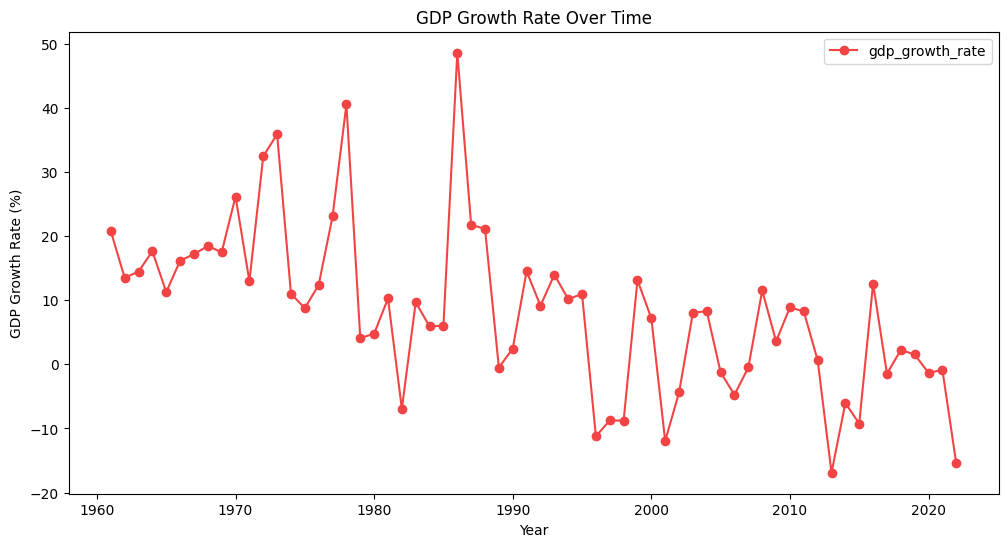

In [62]:
# Create a function for EDA plots (we'll be doing a lot of them)
def plot_japanese_eda(y_col, df=merged_df, x_col='year', figsize=(12, 6), colormap=japanese_colormap, marker='o', xlabel='Year', ylabel=None, title=None, legend=None):
    df.plot(x=x_col, y=y_col, figsize=figsize, colormap=colormap, marker=marker)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    if legend:
        plt.legend(legend)
    plt.show()

# Create a new column for  the GDP growth rate and plot it
merged_df['gdp_growth_rate'] = merged_df['gdp'].pct_change() * 100
plot_japanese_eda('gdp_growth_rate', colormap=japanese_colormap, ylabel='GDP Growth Rate (%)', title='GDP Growth Rate Over Time')

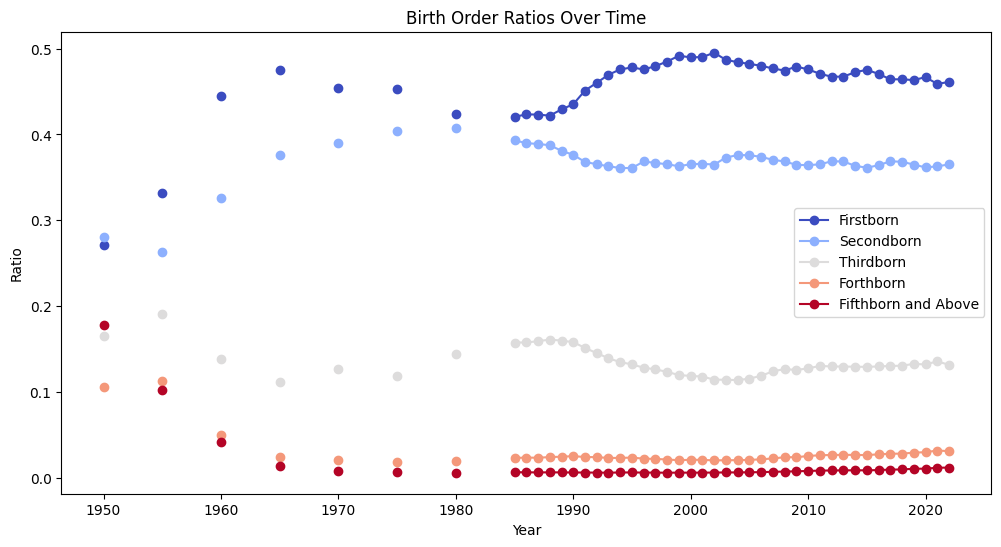

In [63]:
# Plot all birth orders over time
merged_df['firstborn_ratio'] = merged_df['firstborn'] / merged_df['birth_total']
merged_df['secondborn_ratio'] = merged_df['secondborn'] / merged_df['birth_total']
merged_df['thirdborn_ratio'] = merged_df['thirdborn'] / merged_df['birth_total']
merged_df['forthborn_ratio'] = merged_df['forthborn'] / merged_df['birth_total']
merged_df['fifthborn_plus_ratio'] = merged_df['fifthborn_and_above'] / merged_df['birth_total']

plot_japanese_eda(['firstborn_ratio', 'secondborn_ratio', 'thirdborn_ratio', 'forthborn_ratio', 'fifthborn_plus_ratio'], colormap='coolwarm', ylabel='Ratio', title='Birth Order Ratios Over Time', legend=['Firstborn', 'Secondborn', 'Thirdborn', 'Forthborn', 'Fifthborn and Above'])

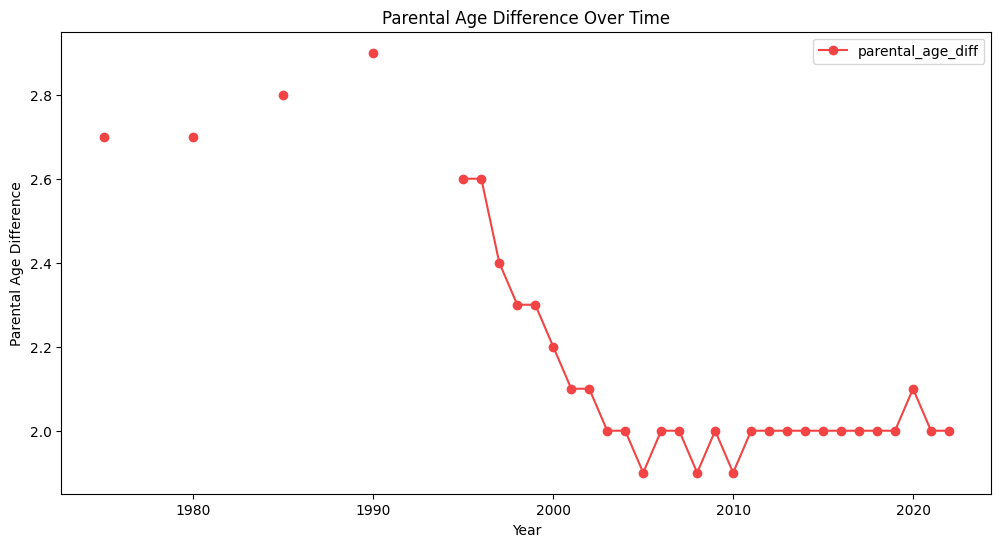

In [64]:
# Plot the parental age difference over time
merged_df['parental_age_diff'] = merged_df['father_age_avg'] - merged_df['mother_age_avg']
plot_japanese_eda('parental_age_diff', colormap=japanese_colormap, ylabel='Parental Age Difference', title='Parental Age Difference Over Time')

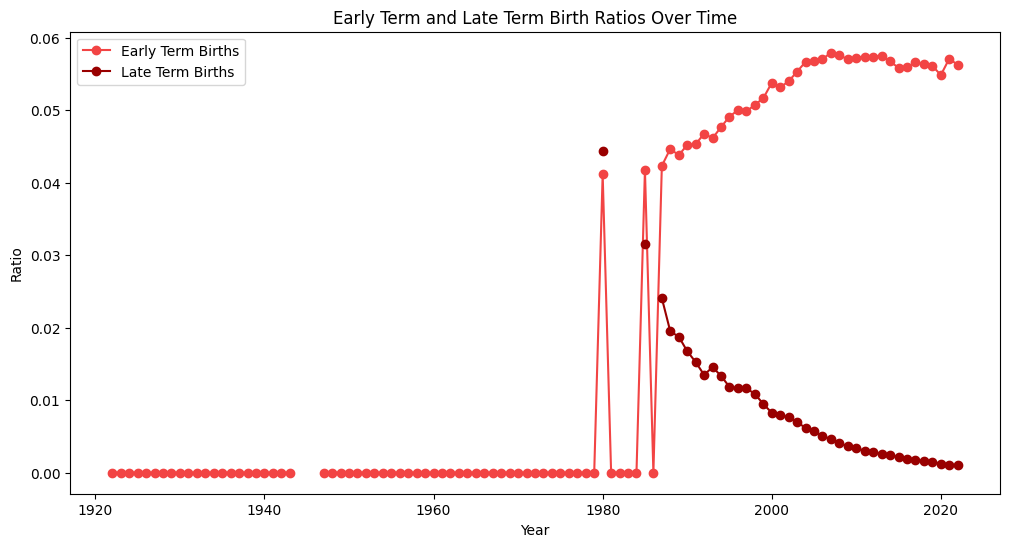

In [65]:
# Plot the ratio of early term and late term births over time
merged_df['early_term_births_ratio'] = merged_df[['weeks_under_28', 'weeks_28-31', 'weeks_32-36']].sum(axis=1) / merged_df['birth_total']
merged_df['late_term_births_ratio'] = merged_df['weeks_over_42'] / merged_df['birth_total']

plot_japanese_eda(['early_term_births_ratio', 'late_term_births_ratio'], colormap=japanese_colormap, ylabel='Ratio', title='Early Term and Late Term Birth Ratios Over Time', legend=['Early Term Births', 'Late Term Births'])

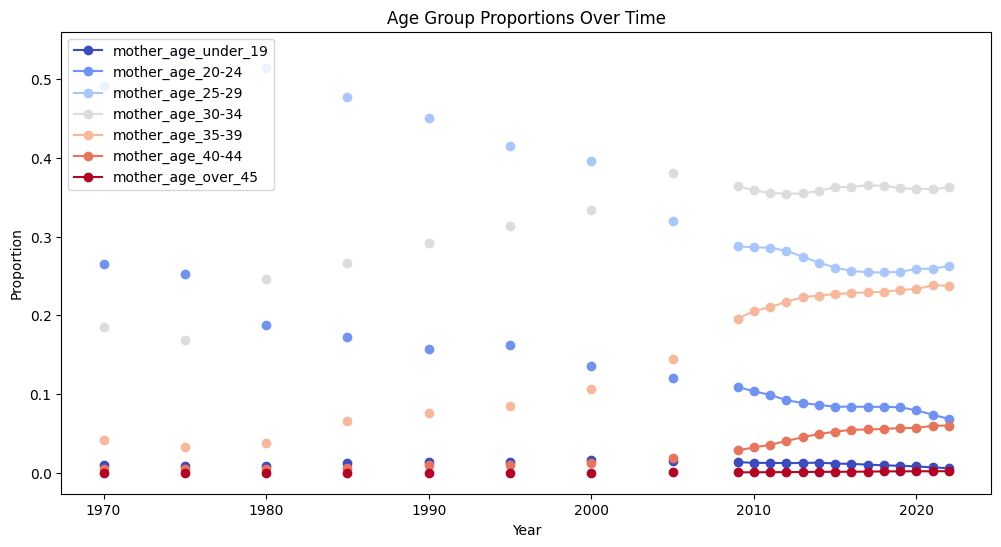

In [66]:
# Plot the maternal age groups over time
age_groups = ['mother_age_under_19', 'mother_age_20-24', 'mother_age_25-29', 
              'mother_age_30-34', 'mother_age_35-39', 'mother_age_40-44', 'mother_age_over_45']
for age_group in age_groups:
    merged_df[f'{age_group}_prop'] = merged_df[age_group] / merged_df['birth_total']


plot_japanese_eda([f'{age_group}_prop' for age_group in age_groups], colormap='coolwarm', ylabel='Proportion', title='Age Group Proportions Over Time', legend=age_groups)    

### *Note About Age of Motherhood

The distribution of mothers' ages at firstborn reveals a nuanced view of changing societal norms regarding motherhood. Over the past century, the average maternal age has seen an upward trajectory, stabilizing around 30 in recent years. This suggests a shift towards later-in-life parenting, possibly reflecting broader global trends in education, career prioritization, and family planning. Despite this rise, the average age has been relatively steady since the mid-1970s, with the youngest average maternal age for firstborns hovering around 27.

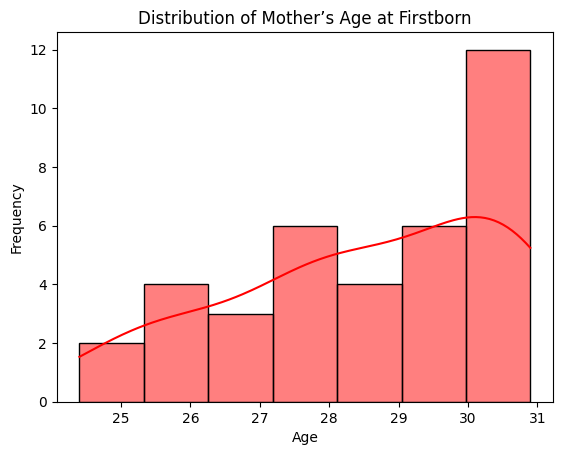

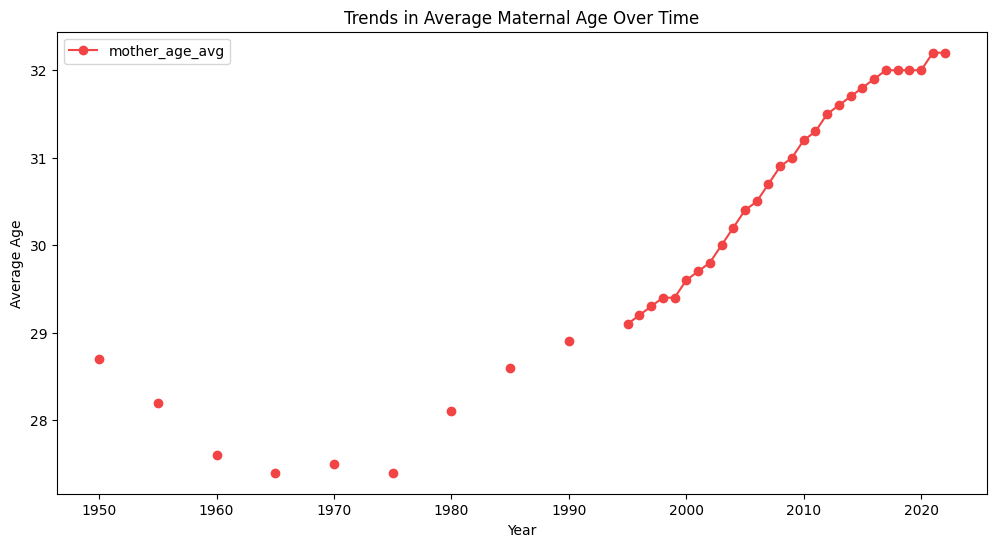

In [67]:
# Age distribution of mothers at the time of firstborns
sns.histplot(data=merged_df, x='mother_age_firstborn', kde=True, color='red')
plt.title('Distribution of Mother’s Age at Firstborn')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Trends in maternal age over time
plot_japanese_eda('mother_age_avg', colormap=japanese_colormap, ylabel='Average Age', title='Trends in Average Maternal Age Over Time')

### *Note About Average Family Size
The average family size, estimated by summing the number of firstborns to fifthborns and beyond, offers a window into the evolving structure of the Japanese family unit. After a noticeable dip around the year 2000, there has been a gradual uptick. However, it's important to note that current figures still fall short of the peaks observed in the 1980s. This trend reflects the interplay between economic factors, cultural shifts, and policy changes, highlighting Japan's transition from larger, multi-child households to smaller family configurations.

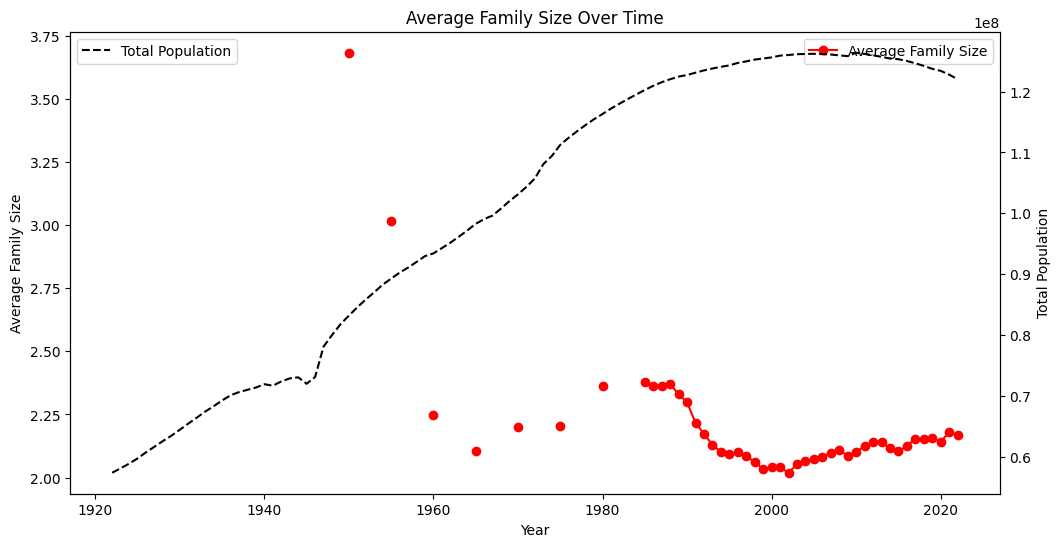

In [68]:
# Calculate the average number of children per family
merged_df['average_family_size'] = (merged_df['firstborn'] + merged_df['secondborn'] + merged_df['thirdborn'] +
                             merged_df['forthborn'] + merged_df['fifthborn_and_above']) / merged_df['firstborn']

# Plotting average family size
plt.figure(figsize=(12, 6))
plt.plot(merged_df['year'], merged_df['average_family_size'], label='Average Family Size', color='red', marker='o')
plt.xlabel('Year')
plt.ylabel('Average Family Size')
plt.title('Average Family Size Over Time')
plt.legend()
plt.twinx()

# Plotting total population
plt.plot(merged_df['year'], merged_df['population_total'], label='Total Population', color='black', linestyle='--')
plt.ylabel('Total Population')
plt.legend(loc='upper left')
plt.show()

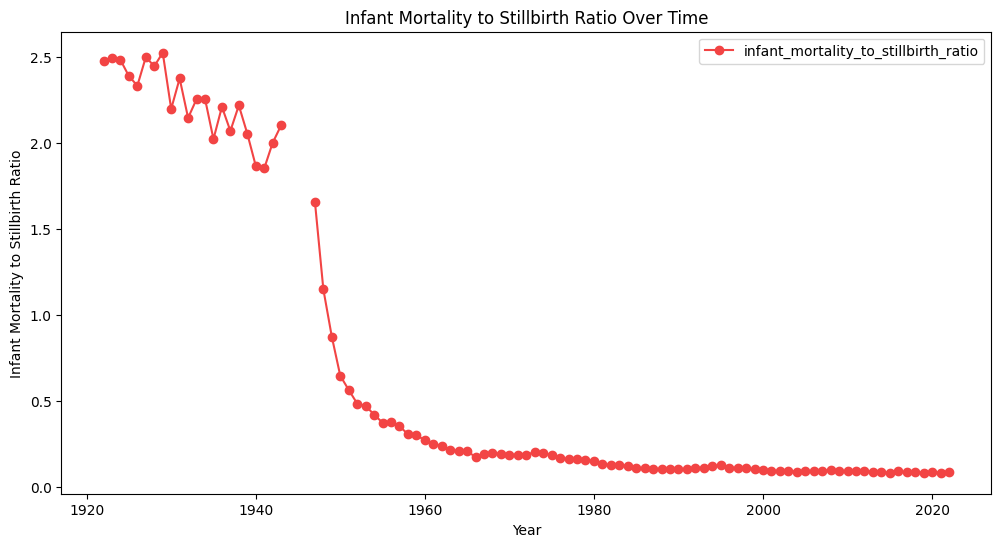

In [69]:
# Plot the infant mortality to stillbirth ratio over time
merged_df['infant_mortality_to_stillbirth_ratio'] = merged_df['infant_death_total'] / merged_df['stillbirth_total']
plot_japanese_eda('infant_mortality_to_stillbirth_ratio', colormap=japanese_colormap, ylabel='Infant Mortality to Stillbirth Ratio', title='Infant Mortality to Stillbirth Ratio Over Time')

### *Additional Notes About Legitimacy Rate
The legitimacy rate's increase in the '70s-'80s and subsequent decrease can be associated with social and economic changes in Japan. During the '70s and '80s, Japan experienced economic growth and stability, which may have supported more traditional family structures, including higher rates of marriage and childbirth within marriage. However, since then, Japan's economy and society have undergone significant transformations. There has been a shift in values, with individualism gaining ground over traditional family norms, and economic pressures, such as the cost of raising children and housing, have also influenced decisions about marriage and childbirth. Additionally, the decline in birth rates is a complex issue linked to factors like increased participation of women in the workforce, later marriages, and a higher cost of living.

The decline in birth rates and changes in social norms have also impacted the legitimacy rate, as there has been a trend toward more children being born outside of marriage. These shifts reflect broader global trends and are indicative of changing societal values in Japan, moving away from the more traditional structures that prevailed in the 1980s.

These demographic trends have profound implications for Japan's future, affecting everything from the labor force and economic growth potential to social welfare policies and the overall societal structure. Japan's demographic challenges are a crucial area of study for policymakers and social scientists, providing a window into similar challenges that other advanced economies may face in the future.

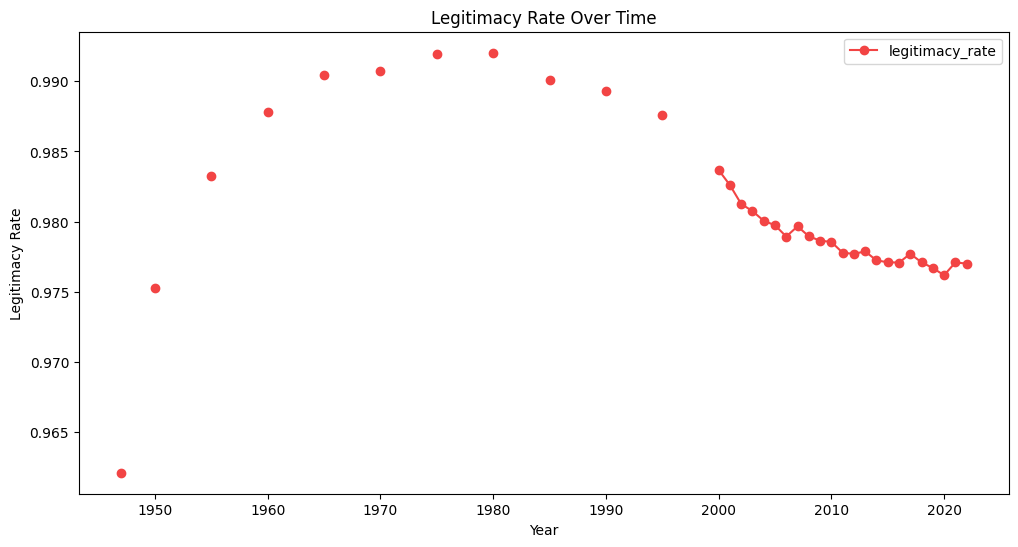

In [70]:
# Plot the legitimacy rate over time
merged_df['legitimacy_rate'] = merged_df['legitimate_child'] / merged_df['birth_total']
plot_japanese_eda('legitimacy_rate', colormap=japanese_colormap, ylabel='Legitimacy Rate', title='Legitimacy Rate Over Time')

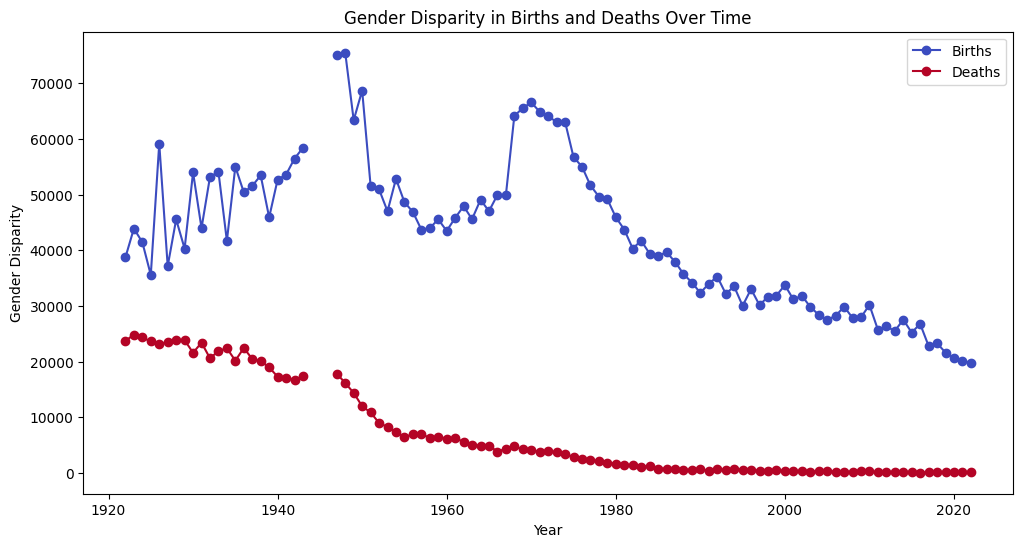

In [71]:
# Plot the gender disparity in births and deaths over time
merged_df['gender_disparity_births'] = merged_df['birth_male'] - merged_df['birth_female']
merged_df['gender_disparity_deaths'] = merged_df['infant_death_male'] - merged_df['infant_death_female']
plot_japanese_eda(['gender_disparity_births', 'gender_disparity_deaths'], colormap='coolwarm', ylabel='Gender Disparity', title='Gender Disparity in Births and Deaths Over Time', legend=['Births', 'Deaths'])

### *Additional Notes About 2010 Population Spike 
The spike in Japan's population around 2010 can be attributed to a combination of factors during that period. Japan's population peaked at more than 128 million people between 2007 and 2010. This was part of a slow but steady growth pattern seen in certain regions, especially in the Kanto region, which includes Tokyo. During the five years leading up to 2010, all of Japan's population growth took place in the core of the Tokyo–Yokohama region. The urbanization and concentration of population in Tokyo, which forms the world's largest urban area with 37 million people, was a significant contributor to this trend.

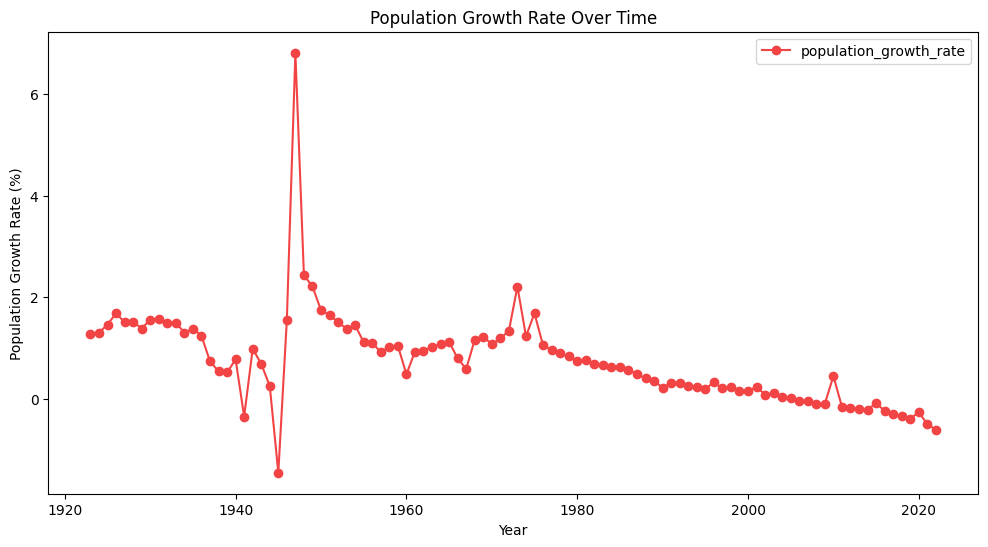

In [72]:
# Plot the population growth rate over time
merged_df['population_growth_rate'] = merged_df['population_total'].pct_change() * 100
plot_japanese_eda('population_growth_rate', colormap=japanese_colormap, ylabel='Population Growth Rate (%)', title='Population Growth Rate Over Time')

# Part 3: Birth Rate Analysis

In our exploration of Japan's demographic data, we delve into the intricate relationship between birth rate, population growth, and economic performance. The following plots will offer visual insights into how the birth rate correlates with population growth—a metric indicative of the country's demographic health—and GDP, which serves as a barometer of economic vitality. By juxtaposing these variables, we aim to unearth patterns and narratives that have shaped Japan's demographic journey over a century.

### 1944-1946:

- This period covers the end of World War II. Japan experienced severe casualties and destruction of infrastructure, which drastically affected population growth.
- The immediate post-war era saw a significant drop in the birth rate due to the disruption of social and family structures, as well as economic hardship.
- Shortly after the war, there was a "baby boom" as soldiers returned home and the country began to rebuild, which led to a sharp increase in the birth rate and altered the population growth rate.

### Late 1960s:

- The late 1960s was a period of high economic growth for Japan, during which the country became one of the world's largest economies.
- This period also saw a shift in societal values and the beginning of a decline in the birth rate as Japan became more urbanized and family planning became more prevalent.
- The introduction of the pill in the 1960s in other countries, and later in Japan, along with other family planning methods, could have contributed to changes in the birth rate.

### Late 1970s:

- Japan experienced rapid economic growth in the post-World War II era, which lasted until the early 1970s. By the late 1970s, the economy began to stabilize and shift from high growth to a more mature, slower growth phase.
- The first oil shock in 1973 and the second in 1979 had significant impacts on the global economy, including Japan's. The economic uncertainty and inflation could have led to a decline in the birth rate as families might delay having children in such times.
- Japan's welfare and healthcare systems were improving, contributing to a lower infant mortality rate and potentially impacting the birth rate.

### 2010s:

- Japan faced a period of economic stagnation and deflation known as the "Lost Decades" starting in the 1990s, which extended into the 2010s. This long-term economic malaise could have affected birth rates as economic conditions are known to influence family planning decisions.
- The country's population has been aging rapidly, with a growing percentage of the population being elderly. This demographic shift could contribute to a lower birth rate and a changing population growth rate.
- The Great East Japan Earthquake and tsunami in March 2011, followed by the Fukushima Daiichi nuclear disaster, had profound social and economic impacts, which may have affected population trends in the short term.


For each of these periods, the mismatches between birth rate and population growth rate can be attributed to complex interactions between economic conditions, societal changes, government policies, and, in some cases, significant natural or man-made events. Each factor could have had a direct or indirect impact on family planning decisions, mortality rates, and migration patterns, influencing the overall demographic trends of Japan.

For a deeper dive into the economic history of Japan during these periods, you can explore sources such as [Wikipedia's page on the 1970s in Japan](https://en.wikipedia.org/wiki/1970s_in_Japan), [Berkeley Economic Review's article on the Japanese Economic Miracle](https://econreview.berkeley.edu/japanese-economic-miracle/), and [Brilliantio's exploration of Japan in the 1970s](https://brilliantio.com/what-was-japan-like-in-the-1970s/).

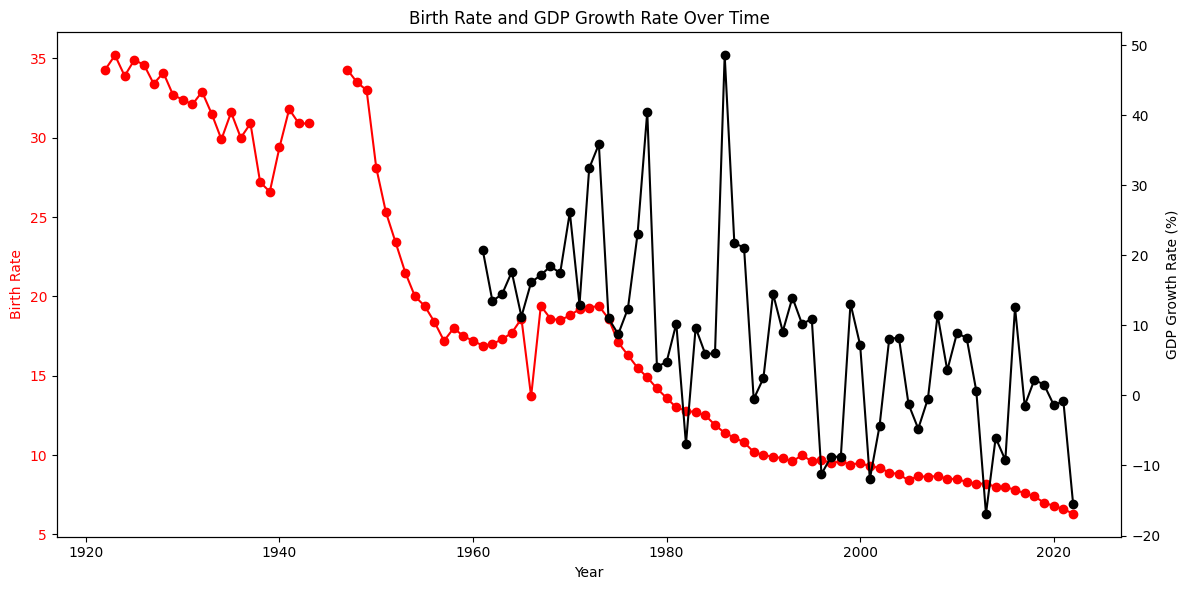

In [73]:
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot the birth rate on the primary y-axis
ax1.plot(merged_df['year'], merged_df['birth_rate'], color='red', label='Birth Rate', marker='o')
ax1.set_xlabel('Year')
ax1.set_ylabel('Birth Rate', color='red')
ax1.tick_params(axis='y', labelcolor='red')

# Create a secondary y-axis for the GDP growth rate
ax2 = ax1.twinx()  
ax2.plot(merged_df['year'], merged_df['gdp_growth_rate'], color='black', label='GDP Growth Rate', marker='o')
ax2.set_ylabel('GDP Growth Rate (%)', color='black')  
ax2.tick_params(axis='y', labelcolor='black')

plt.title('Birth Rate and GDP Growth Rate Over Time')
fig.tight_layout()  
plt.show()

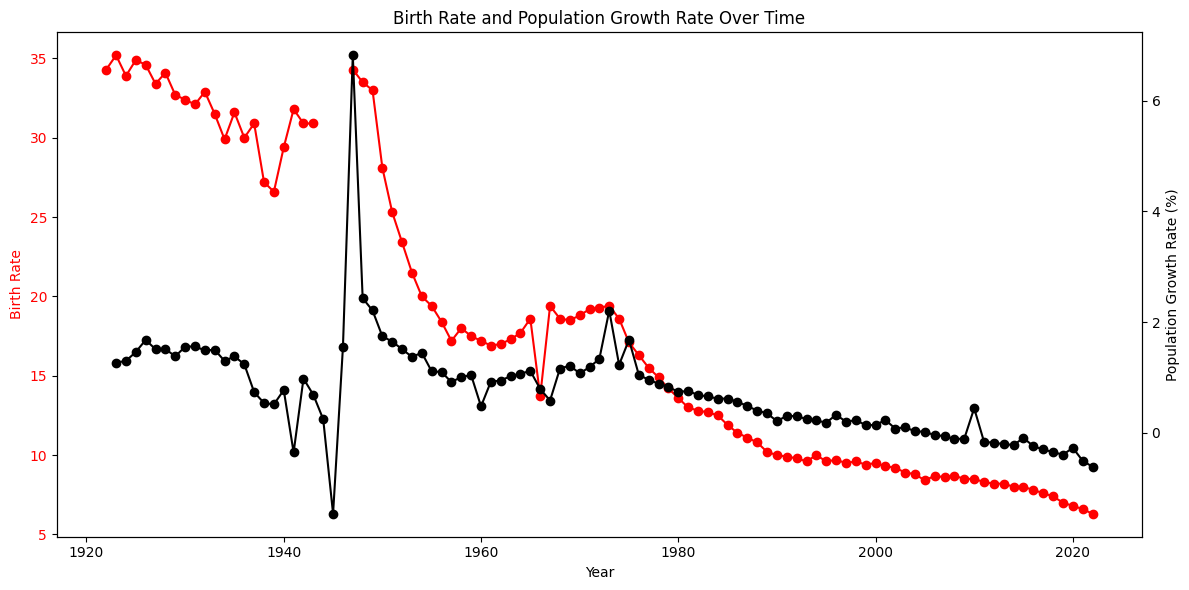

In [74]:
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot birth rate on the primary y-axis
ax1.plot(merged_df['year'], merged_df['birth_rate'], color='red', label='Birth Rate', marker='o')
ax1.set_xlabel('Year')
ax1.set_ylabel('Birth Rate', color='red')
ax1.tick_params(axis='y', labelcolor='red')

# Create a secondary y-axis for the population growth rate
ax2 = ax1.twinx()  
ax2.plot(merged_df['year'], merged_df['population_growth_rate'], color='black', label='Population Growth Rate', marker='o')
ax2.set_ylabel('Population Growth Rate (%)', color='black')  
ax2.tick_params(axis='y', labelcolor='black')

plt.title('Birth Rate and Population Growth Rate Over Time')
fig.tight_layout()  
plt.show()

# Step 4: Correlation Analysis: Birth Rate and Sociodemographic Factors

Exploring the correlation between birth rate and various sociodemographic factors over a century provides fascinating insights into Japan's evolving societal landscape. Key correlations unearth trends and shifts in family planning, healthcare, and gender disparity.

### High Correlation Observations

- **Mother's Age at Firstborn (0.993467)**: The strong positive correlation with the mother's age at firstborn highlights the tendency for higher birth rates during years when mothers were younger at the birth of their first child. This may reflect historical periods with more traditional family structures or different societal norms regarding the ideal age for starting a family.

- **Weeks 37-41 (0.990562)**: The near-perfect correlation with full-term births (weeks 37-41) suggests that healthier pregnancy outcomes, with births occurring in this ideal gestational window, are a significant contributor to overall birth rates.

- **Legitimate Child (0.975130)**: The high positive correlation with the number of births to married parents (legitimate children) underscores the influence of marital status on birth rates, potentially reflecting societal norms, economic stability, and support systems that favor childbirth within marriage.

- **Total Fertility Rate (0.961764)**: As expected, the total fertility rate—which measures the average number of children a woman will have in her lifetime—shows a strong positive correlation with the birth rate, indicating that as women have more children, the overall birth rate increases.

- **Gender Disparity in Deaths (0.958802)**: The high correlation here may indicate that as healthcare improves and gender disparities in infant mortality decrease, overall birth rates are positively impacted, possibly due to increased confidence in child survival.

### Negative Correlation Observations

- **Population Total (-0.970053)**: The strong negative correlation with total population suggests that as Japan's population has grown, the birth rate has declined, which could reflect urbanization, increased cost of living, or greater access to education and contraception.

- **GDP (-0.928717)**: Interestingly, the negative correlation with GDP implies that as Japan's economy grew, the birth rate decreased. This counterintuitive trend might be due to increased career opportunities, higher costs associated with raising children, or shifts in personal aspirations and lifestyle choices in a more affluent society.

- **Year (-0.953879)**: The progression of time shows a strong negative correlation with birth rate, signaling a consistent decline over the years. This decline could be influenced by a multitude of factors, including economic, cultural, and policy changes.

Each of these correlations tells a part of Japan's demographic story, shedding light on the complex interplay between economic development, societal norms, healthcare advances, and family planning preferences. The decline in birth rates amidst economic growth and societal modernization poses significant challenges and opportunities for policymakers and society at large.

In [75]:
pd.set_option('display.max_rows', None)

# Compute the Pearson correlation matrix
correlation_matrix = merged_df.corr()

# Extract correlations of GDP with other variables
gdp_correlations = correlation_matrix['birth_rate'].sort_values(ascending=False)
pd.DataFrame(gdp_correlations)

,birth_rate
birth_rate,1.000000
mother_age_20-24,0.993467
weeks_37-41,0.990562
legitimate_child,0.975130
mother_age_20-24_prop,0.972368
mother_age_25-29,0.971761
infant_deaths_in_total_deaths,0.965419
total_fertility_rate,0.961764
gender_disparity_deaths,0.958802
late_term_births_ratio,0.941593


## Step 5: Forecasting Japan's Birth Rate w/ Basic & Advanced Linear Regression

In analyzing Japan's demographic data, I utilized two regression models to forecast future trends: a basic linear regression model for the birth rate and an advanced regression model for the total number of births. Both models aimed to shed light on the future demographic landscape of Japan, with each employing a distinct approach to incorporating economic and social variables.

### Basic Linear Regression Model for Birth Rate

**Methodology**: My basic linear regression model includes multiple features such as GDP, fertility rate, and total population. This approach allows for an examination of how these variables collectively influence the birth rate. For forecasting, I assumed continual growth or decline of these three features based on historical trends.

**Findings**: The basic model, incorporating these critical socioeconomic indicators, predicts a continuous decline in the birth rate. This trend reflects the complexities of Japan's aging population, economic conditions, and fertility preferences.

### Advanced Regression Model for Birth Total

**Methodology**: The advanced model extends the forecasting methodology by employing statistical modeling (Linear Regression) to predict future values of GDP, fertility rate, and total population. Unlike the basic model, which relies on assumed continual trends, the advanced model uses these forecasts as inputs, providing a dynamic and potentially more accurate projection of future birth totals.

**Findings**: By leveraging detailed forecasts of key features, the advanced model offers a nuanced perspective on the decline in total births. It underscores the significant impact of economic performance, population dynamics, and fertility trends on demographic changes, providing a comprehensive view of potential future scenarios.

### Conclusion

While both the basic and advanced regression models project a continuing decline in Japan's demographic indicators, the advanced model's incorporation of statistically forecasted features for GDP, fertility rate, and total population enriches the analysis. This approach not only confirms the expected trends but also enhances our understanding of the underlying factors driving these changes. The comparative use of both models illustrates the multifaceted nature of demographic forecasting, highlighting the importance of economic and social variables in shaping future trends.


### Step 5a: Standard Linear Regression Forecast

In [76]:
# Select features based on domain knowledge
selected_columns = ['population_total', 'gdp', 'total_fertility_rate'] 
X = merged_df[selected_columns]
y = merged_df['birth_rate']

# Handle missing values
X = X.dropna()

# Ensure y has the same rows as X after dropping NAs
y = y[X.index]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

# Initialize the model
model = LinearRegression()

# Fit the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 0.957508404448007
R^2 Score: 0.9162947856653667


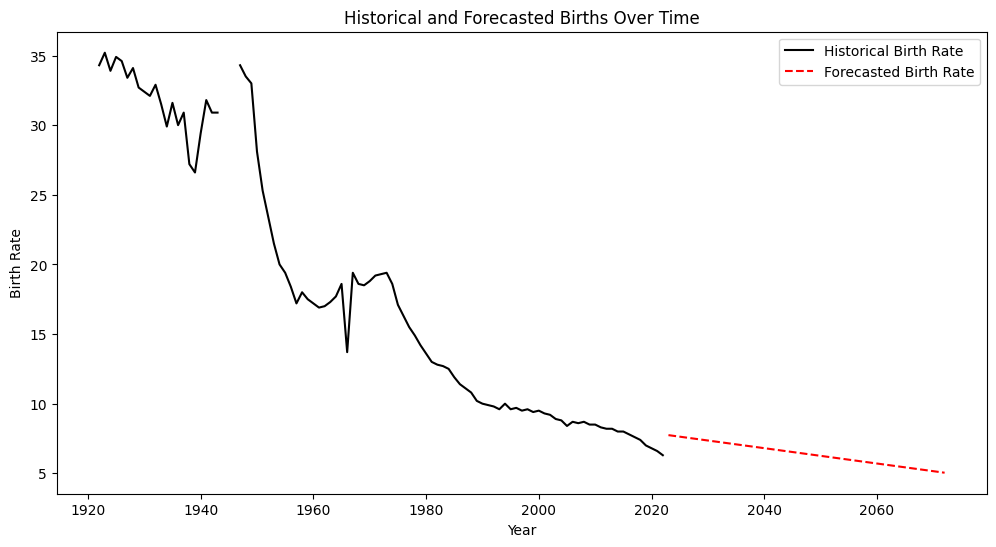

In [77]:
# Project future values for the next 50 years
latest_year = merged_df['year'].max()
future_years = np.arange(latest_year + 1, latest_year + 51)  # Next 50 years

# Create a DataFrame for future features
# For simplicity, I will assume constant growth rate or change
future_features = pd.DataFrame({
    'year': future_years,
    'population_total': np.linspace(merged_df['population_total'].iloc[-1], 
                                    merged_df['population_total'].iloc[-1] * 1.1, len(future_years)),  # assumed 10% increase
    'gdp': np.linspace(merged_df['gdp'].iloc[-1], merged_df['gdp'].iloc[-1] * 1.5, len(future_years)),  # assumed 50% increase 
    'total_fertility_rate': np.linspace(merged_df['total_fertility_rate'].iloc[-1], 
                                        merged_df['total_fertility_rate'].iloc[-1] * 0.9, len(future_years))  # assumed 10% decrease
})

# Predict future 'birth_total' using the projected features
future_births = model.predict(future_features[['population_total', 'gdp', 'total_fertility_rate']])

# Plotting
plt.figure(figsize=(12, 6))
# Plot historical data
plt.plot(merged_df['year'], merged_df['birth_rate'], label='Historical Birth Rate', color='black')
# Plot forecasts
plt.plot(future_years, future_births, label='Forecasted Birth Rate', linestyle='--', color='red')

plt.xlabel('Year')
plt.ylabel('Birth Rate')
plt.title('Historical and Forecasted Births Over Time')
plt.legend()
plt.show()


### Step 5b: Slightly More Advanced Linear Regression - Predicting the Predictors

In [78]:
# Create a function to perform a simple linear regression forecast
def linear_forecast(df, column, future_periods):
    # Fit the linear regression model
    model_p = LinearRegression()
    
    # Match the index from df['year'] and df[column]
    df_clean = df[['year', column]].dropna()
    years = np.array(df_clean['year']).reshape(-1, 1)
    
    model_p.fit(years, df_clean[column])
    
    # Predict future values
    future_years = np.array(range(years[-1, 0] + 1, years[-1, 0] + future_periods + 1)).reshape(-1, 1)
    future_preds = model_p.predict(future_years)
    
    return future_preds

# Predict future values for 'gdp', 'population_total', and 'total_fertility_rate'
future_gdp = linear_forecast(merged_df, 'gdp', 30)
future_population_total = linear_forecast(merged_df, 'population_total', 30)
future_fertility_rate = linear_forecast(merged_df, 'total_fertility_rate', 30)

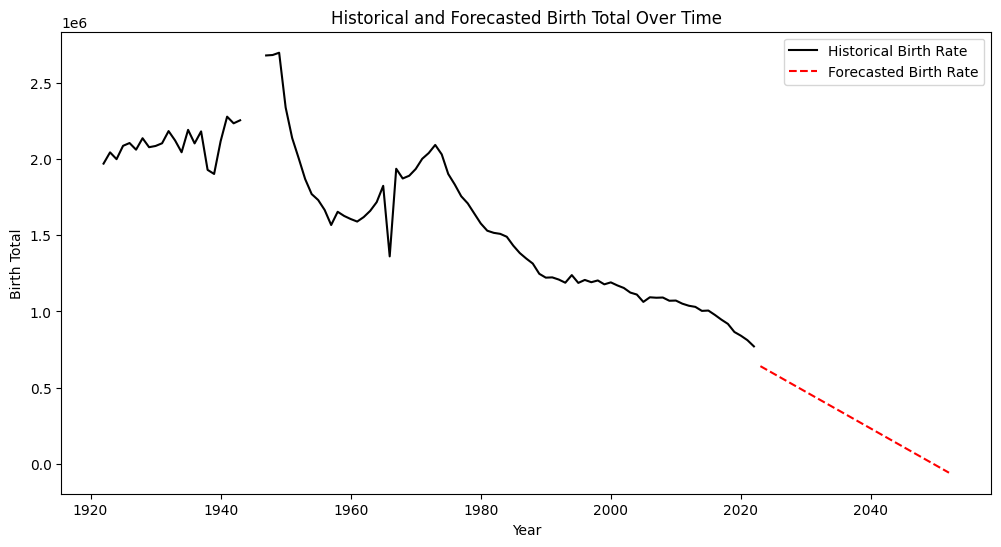

In [79]:
model = LinearRegression()

X = merged_df[['gdp', 'population_total', 'total_fertility_rate']].dropna()
y = merged_df['birth_total'][X.index]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

model.fit(X_train, y_train)

# Stack the future projections for input into the model
future_features = np.column_stack((future_gdp, future_population_total, future_fertility_rate))

# Predict 'birth_total' for the future using the model and predicted features
future_birth_rate = model.predict(future_features)

# Create a DataFrame for the predictions to facilitate plotting
future_years = np.arange(merged_df['year'].max() + 1, merged_df['year'].max() + 31)
predictions_df = pd.DataFrame({
    'year': future_years,
    'predicted_birth_total': future_birth_rate
})

# Plot the historical data and the forecast
plt.figure(figsize=(12, 6))
plt.plot(merged_df['year'], merged_df['birth_total'], label='Historical Birth Rate', color='black')
plt.plot(predictions_df['year'], predictions_df['predicted_birth_total'], label='Forecasted Birth Rate', linestyle='--', color='red')
plt.xlabel('Year')
plt.ylabel('Birth Total')
plt.title('Historical and Forecasted Birth Total Over Time')
plt.legend()
plt.show()